In [1]:
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

Using TensorFlow backend.


In [2]:
df2=pd.read_csv('final_data.csv',index_col='dates',parse_dates=True)

In [3]:
df2.head()

,frequency
dates,
2015-01-01,95
2015-01-02,51
2015-01-03,43
2015-01-04,58
2015-01-05,53


In [37]:
result=seasonal_decompose(df2['frequency']['2019-01-01':'2019-01-30'],model='mul')

In [40]:
from pylab import rcParams
rcParams['figure.figsize']=8,5

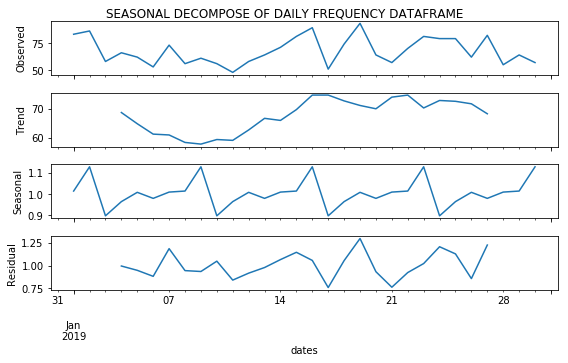

In [41]:
result.plot().suptitle('SEASONAL DECOMPOSE OF DAILY FREQUENCY DATAFRAME', y=1);

In [7]:
1753-15

1738

In [8]:
train=df2[:1738]
test=df2[1738:]

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(train)

C:\Users\AANSHI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
n_input = 15
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [13]:
model = Sequential()

model.add(LSTM(250,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 250)               252000    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit_generator(train_generator,epochs=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
1723/1723 [==============================] - 29s 17ms/step - loss: 0.0221 0s - loss: 0.0
Epoch 2/200
1723/1723 [==============================] - 24s 14ms/step - loss: 0.0208 
Epoch 3/200
1723/1723 [==============================] - 27s 16ms/step - loss: 0.0201
Epoch 4/200
1723/1723 [==============================] - 25s 14ms/step - loss: 0.0201 0s - 
Epoch 5/200
1723/1723 [==============================] - 23s 13ms/step - loss: 0.0197
Epoch 6/200
1723/1723 [==============================] - 22s 13ms/step - loss: 0.0200
Epoch 7/200
1723/1723 [==============================] - 20s 12ms/step - loss: 0.0195
Epoch 8/200
1723/1723 [==============================] - 19s 11ms/step - loss: 0.0195
Epoch 9/200
1723/1723 [==============================] - 21s 12ms/step - loss: 0.0196 0s -
Epoch 10/200
1723/1723 [==============================] - 20s 11ms/step - loss: 0.0195
Epoch 11/200
1723/1723 [==============================] - 20s 12

1723/1723 [==============================] - 19s 11ms/step - loss: 0.0184
Epoch 91/200
1723/1723 [==============================] - 21s 12ms/step - loss: 0.0182
Epoch 92/200
1723/1723 [==============================] - 21s 12ms/step - loss: 0.0183
Epoch 93/200
1723/1723 [==============================] - 22s 13ms/step - loss: 0.0182
Epoch 94/200
1723/1723 [==============================] - 22s 13ms/step - loss: 0.0182
Epoch 95/200
1723/1723 [==============================] - 22s 13ms/step - loss: 0.0181
Epoch 96/200
1723/1723 [==============================] - 21s 12ms/step - loss: 0.0183
Epoch 97/200
1723/1723 [==============================] - 22s 13ms/step - loss: 0.0182
Epoch 98/200
1723/1723 [==============================] - 21s 12ms/step - loss: 0.0182 0s - loss: 
Epoch 99/200
1723/1723 [==============================] - 22s 13ms/step - loss: 0.0179
Epoch 100/200
1723/1723 [==============================] - 21s 12ms/step - loss: 0.0180
Epoch 101/200
1723/1723 [==================

1723/1723 [==============================] - 26s 15ms/step - loss: 0.0142
Epoch 182/200
1723/1723 [==============================] - 27s 16ms/step - loss: 0.0142
Epoch 183/200
1723/1723 [==============================] - 25s 14ms/step - loss: 0.0142
Epoch 184/200
1723/1723 [==============================] - 26s 15ms/step - loss: 0.0142
Epoch 185/200
1723/1723 [==============================] - 23s 14ms/step - loss: 0.0139
Epoch 186/200
1723/1723 [==============================] - 24s 14ms/step - loss: 0.0145
Epoch 187/200
1723/1723 [==============================] - 22s 13ms/step - loss: 0.0140
Epoch 188/200
1723/1723 [==============================] - 26s 15ms/step - loss: 0.0139 1s - 
Epoch 189/200
1723/1723 [==============================] - 24s 14ms/step - loss: 0.0139
Epoch 190/200
1723/1723 [==============================] - 27s 15ms/step - loss: 0.0137
Epoch 191/200
1723/1723 [==============================] - 27s 16ms/step - loss: 0.0136
Epoch 192/200
1723/1723 [===============

In [16]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    current_prediction = model.predict(current_batch)[0]
    
    test_predictions.append(current_prediction)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_prediction]],axis=1)
    
#print(scaler.inverse_transform(test_predictions))

In [17]:
true_predictions = scaler.inverse_transform(test_predictions)

In [18]:
len(true_predictions)

15

In [19]:
df2['frequency'].iloc[-15:]

dates
2019-10-05    125
2019-10-06     78
2019-10-07     79
2019-10-08     84
2019-10-09    100
2019-10-10     94
2019-10-11     96
2019-10-12     86
2019-10-13     89
2019-10-14     77
2019-10-15     58
2019-10-16     92
2019-10-17    104
2019-10-18     70
2019-10-19     26
Name: frequency, dtype: int64

In [20]:
f=[]
f=df2['frequency'].iloc[-15:]

In [21]:
error=rmse(df2['frequency'],true_predictions)

In [22]:
error[-15:]

array([30.01556452, 22.12012527, 21.26165835, 17.2002612 , 11.48824474,
       11.55122175, 11.17797261, 15.72785214, 13.77097871, 22.99003628,
       40.67107651, 12.24395264, 13.07717334, 29.3127029 , 71.98524086])

In [23]:
true_predictions=list(true_predictions)

In [24]:
df2['Prediction'] = df2['frequency']

In [25]:
df2['Prediction'][-15:]=true_predictions

In [26]:
df2['Prediction'].tail(15)

dates
2019-10-05    122.809435
2019-10-06    107.960444
2019-10-07     88.190151
2019-10-08     98.178044
2019-10-09     94.092049
2019-10-10     82.405815
2019-10-11     89.596605
2019-10-12    109.040691
2019-10-13     92.809038
2019-10-14     93.230187
2019-10-15     88.545607
2019-10-16     90.120970
2019-10-17     90.582006
2019-10-18     93.202700
2019-10-19    116.049953
Name: Prediction, dtype: float64

In [27]:
df2['Prediction'].tail(15)-df2['frequency'].tail(15)

dates
2019-10-05    -2.190565
2019-10-06    29.960444
2019-10-07     9.190151
2019-10-08    14.178044
2019-10-09    -5.907951
2019-10-10   -11.594185
2019-10-11    -6.403395
2019-10-12    23.040691
2019-10-13     3.809038
2019-10-14    16.230187
2019-10-15    30.545607
2019-10-16    -1.879030
2019-10-17   -13.417994
2019-10-18    23.202700
2019-10-19    90.049953
dtype: float64

In [28]:
df2['frequency'].tail(15)

dates
2019-10-05    125
2019-10-06     78
2019-10-07     79
2019-10-08     84
2019-10-09    100
2019-10-10     94
2019-10-11     96
2019-10-12     86
2019-10-13     89
2019-10-14     77
2019-10-15     58
2019-10-16     92
2019-10-17    104
2019-10-18     70
2019-10-19     26
Name: frequency, dtype: int64

Text(0.5,1,'DAILY FREQUENCY ANALYSIS AND PREDICTION')

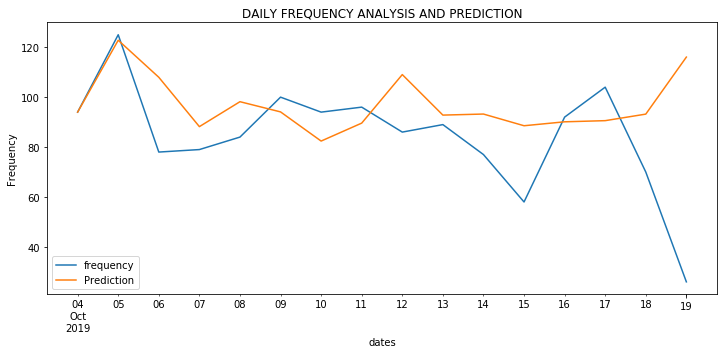

In [32]:
ax=df2['frequency']['2019-10-04':'2019-10-19'].plot(figsize=(12,5),legend=True)
df2['Prediction']['2019-10-04':'2019-10-19'].plot(legend=True)
ax.set_ylabel('Frequency')
ax.set_title('DAILY FREQUENCY ANALYSIS AND PREDICTION')

In [30]:
from statsmodels.tools.eval_measures import rmse

In [31]:
rmse(df2['frequency'].tail(15),df2['Prediction'].tail(15))

28.250077176245338